# Data Generation for Dynamic Pricing

**Purpose:** Generate synthetic demand data that simulates real-world market behavior.

**What we'll do:**
1. Define price elasticity (demand decreases as price increases)
2. Add seasonal effects (festive boosts using sine waves)
3. Simulate competitor pricing
4. Add market noise for realism
5. Visualize and save the data

---

## 1. Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set random seed for reproducibility
np.random.seed(42)

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Define Parameters for Data Generation

We'll simulate market conditions for 365 days (1 year) with the following characteristics:
- **Price Range:** ₹50 to ₹150
- **Base Demand:** 1000 units at optimal price
- **Price Elasticity:** -1.5 (demand decreases as price increases)
- **Seasonal Effect:** Sales boost during festive seasons
- **Competitor Pricing:** Dynamic competitor prices affecting our demand

In [2]:
# Simulation Parameters
NUM_DAYS = 365
BASE_DEMAND = 1000
OPTIMAL_PRICE = 100
PRICE_ELASTICITY = -1.5
MIN_PRICE = 50
MAX_PRICE = 150

print(f"Simulating {NUM_DAYS} days of market data")
print(f"Price Range: ₹{MIN_PRICE} - ₹{MAX_PRICE}")
print(f"Base Demand: {BASE_DEMAND} units")
print(f"Price Elasticity: {PRICE_ELASTICITY}")

Simulating 365 days of market data
Price Range: ₹50 - ₹150
Base Demand: 1000 units
Price Elasticity: -1.5


## 3. Generate Synthetic Market Data

We'll create a demand function that includes:
1. **Price Elasticity:** Demand = Base × (Price/Optimal)^elasticity
2. **Seasonal Effect:** Sine wave to simulate festive seasons
3. **Competitor Price Effect:** Competitive pricing dynamics
4. **Random Noise:** Market uncertainty

In [3]:
def generate_demand_data(num_days=365):
    """
    Generate synthetic demand data for dynamic pricing simulation
    """
    data = []

    for day in range(num_days):
        # Generate varying prices (simulating different price points)
        price = np.random.uniform(MIN_PRICE, MAX_PRICE)

        # Competitor price (fluctuates around our optimal price)
        competitor_price = OPTIMAL_PRICE + np.random.normal(0, 15)
        competitor_price = np.clip(competitor_price, MIN_PRICE, MAX_PRICE)

        # Seasonal effect (festive season boost using sine wave)
        # Peak during day 335 (December), 80 (March), etc.
        seasonal_factor = 1 + 0.3 * np.sin(2 * np.pi * day / 365)

        # Price elasticity effect
        price_ratio = price / OPTIMAL_PRICE
        elasticity_effect = np.power(price_ratio, PRICE_ELASTICITY)

        # Competitor effect (if competitor price is lower, our demand decreases)
        competitor_effect = 1 - 0.2 * (competitor_price < price)

        # Base demand calculation
        demand = BASE_DEMAND * elasticity_effect * seasonal_factor * competitor_effect

        # Add random noise (±10%)
        noise = np.random.normal(1, 0.1)
        demand = demand * noise

        # Ensure demand is non-negative
        demand = max(0, demand)

        # Calculate revenue
        revenue = price * demand

        data.append({
            'day': day,
            'price': round(price, 2),
            'competitor_price': round(competitor_price, 2),
            'demand': round(demand, 2),
            'revenue': round(revenue, 2),
            'seasonal_factor': round(seasonal_factor, 3)
        })

    return pd.DataFrame(data)


# Generate the dataset
df = generate_demand_data(NUM_DAYS)

print("Data generated successfully!")
print(f"\nDataset Shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Data generated successfully!

Dataset Shape: (365, 6)

First 5 rows:


,day,price,competitor_price,demand,revenue,seasonal_factor
0,0,87.45,83.32,1009.38,88274.16,1.000
1,1,65.60,123.69,2037.04,133628.49,1.005
2,2,52.06,91.29,2548.57,132674.53,1.010
3,3,68.34,103.63,1453.55,99336.16,1.015
4,4,93.19,112.25,961.58,89613.83,1.021


## 4. Statistical Summary

In [4]:
print("Statistical Summary of Generated Data:\n")
print(df.describe())

Statistical Summary of Generated Data:

              day       price  competitor_price       demand        revenue  \
count  365.000000  365.000000        365.000000   365.000000     365.000000   
mean   182.000000  100.298164         99.146548  1146.337425   95390.596932   
std    105.510663   30.094395         15.377143   767.702071   35135.856241   
min      0.000000   50.510000         50.000000   290.450000   41071.200000   
25%     91.000000   73.760000         89.470000   555.610000   69507.430000   
50%    182.000000   99.840000         99.060000   895.850000   89563.280000   
75%    273.000000  127.960000        108.400000  1520.130000  114314.370000   
max    364.000000  149.970000        141.670000  3756.040000  207214.010000   

       seasonal_factor  
count       365.000000  
mean          1.000000  
std           0.212418  
min           0.700000  
25%           0.788000  
50%           1.000000  
75%           1.212000  
max           1.300000  


## 5. Data Visualization

Let's visualize the relationships between price, demand, competitor pricing, and seasonal effects.

/var/folders/n4/8xtjr1td3wx9pnrdqwj27z0r0000gn/T/ipykernel_3959/3109627986.py:21: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/n4/8xtjr1td3wx9pnrdqwj27z0r0000gn/T/ipykernel_3959/3109627986.py:22: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  plt.savefig('../visuals/price_vs_demand.png', dpi=300, bbox_inches='tight')
/Users/dhrumishah/Documents/Codes/dynamic-pricing-rl/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


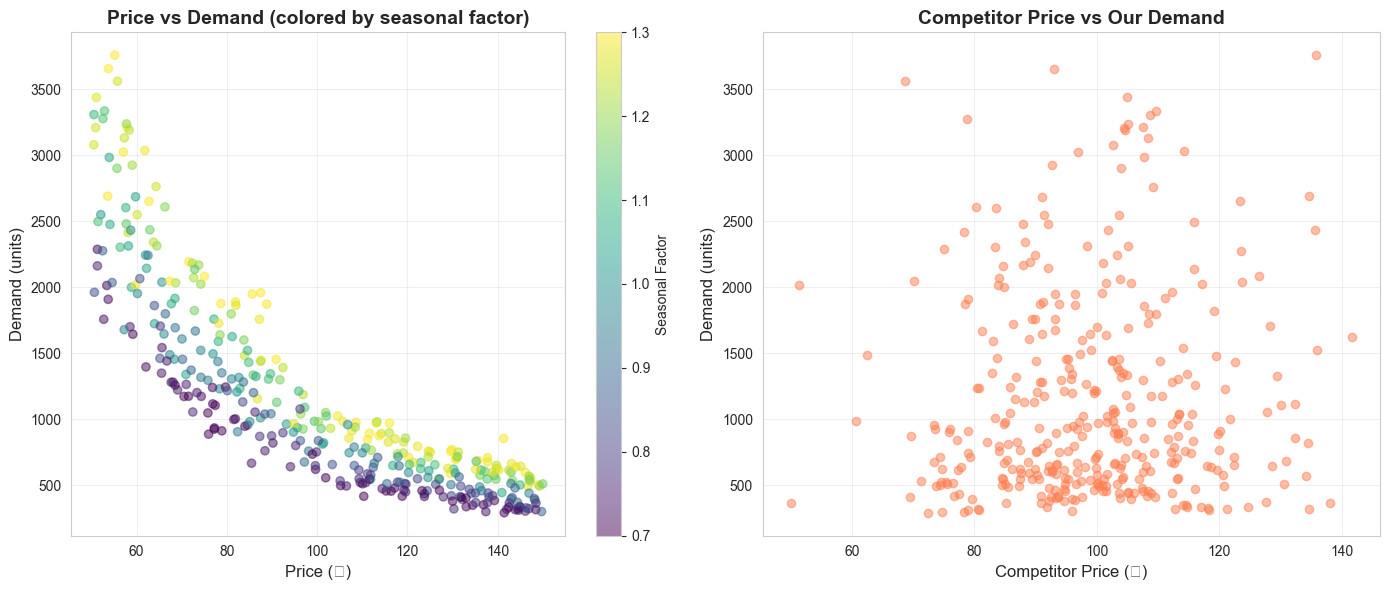

Visualization 1 saved to visuals/price_vs_demand.png


In [5]:
# 1. Price vs Demand Scatter Plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['price'], df['demand'], alpha=0.5,
            c=df['seasonal_factor'], cmap='viridis')
plt.xlabel('Price (₹)', fontsize=12)
plt.ylabel('Demand (units)', fontsize=12)
plt.title('Price vs Demand (colored by seasonal factor)',
          fontsize=14, fontweight='bold')
plt.colorbar(label='Seasonal Factor')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(df['competitor_price'], df['demand'], alpha=0.5, color='coral')
plt.xlabel('Competitor Price (₹)', fontsize=12)
plt.ylabel('Demand (units)', fontsize=12)
plt.title('Competitor Price vs Our Demand', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../visuals/price_vs_demand.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization 1 saved to visuals/price_vs_demand.png")

/var/folders/n4/8xtjr1td3wx9pnrdqwj27z0r0000gn/T/ipykernel_3959/4180520927.py:31: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  plt.tight_layout()


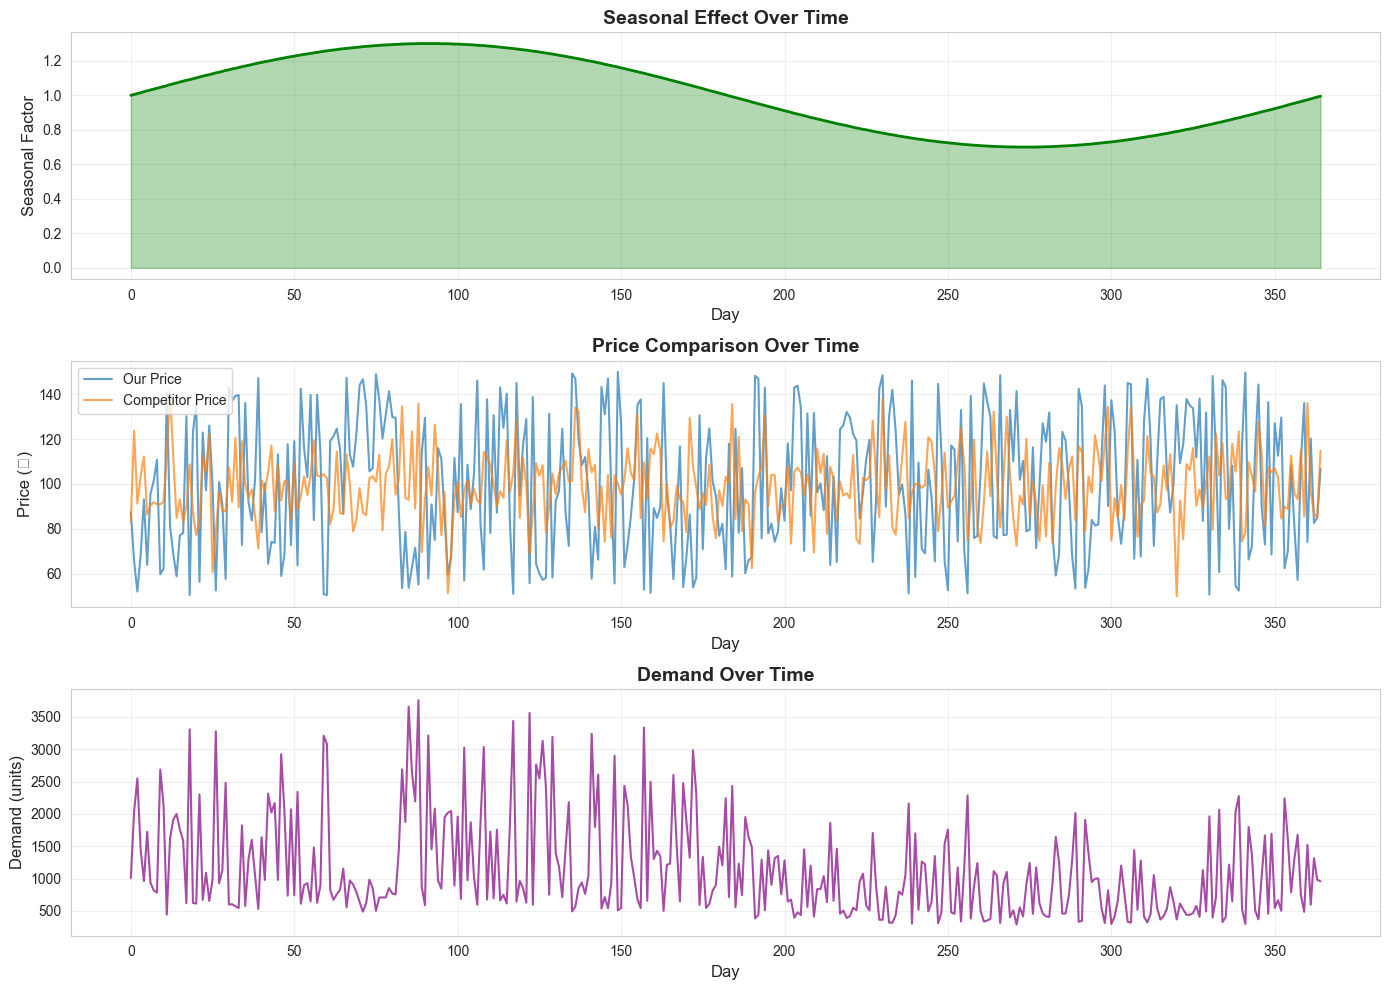

In [6]:
# 2. Time Series Analysis
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Plot 1: Seasonal Factor over time
axes[0].plot(df['day'], df['seasonal_factor'], color='green', linewidth=2)
axes[0].set_xlabel('Day', fontsize=12)
axes[0].set_ylabel('Seasonal Factor', fontsize=12)
axes[0].set_title('Seasonal Effect Over Time', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].fill_between(df['day'], df['seasonal_factor'],
                     alpha=0.3, color='green')

# Plot 2: Price and Competitor Price over time
axes[1].plot(df['day'], df['price'], label='Our Price',
             alpha=0.7, linewidth=1.5)
axes[1].plot(df['day'], df['competitor_price'],
             label='Competitor Price', alpha=0.7, linewidth=1.5)
axes[1].set_xlabel('Day', fontsize=12)
axes[1].set_ylabel('Price (₹)', fontsize=12)
axes[1].set_title('Price Comparison Over Time', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Demand over time
axes[2].plot(df['day'], df['demand'], color='purple', alpha=0.7, linewidth=1.5)
axes[2].set_xlabel('Day', fontsize=12)
axes[2].set_ylabel('Demand (units)', fontsize=12)
axes[2].set_title('Demand Over Time', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Save Data to CSV

Save the generated dataset for use in subsequent notebooks.

In [7]:
# Save to CSV
output_path = '../data/simulated_demand.csv'
df.to_csv(output_path, index=False)

print(f"Data saved successfully to: {output_path}")
print(f"Total records: {len(df)}")
print(f"File size: {os.path.getsize(output_path) / 1024:.2f} KB")

Data saved successfully to: ../data/simulated_demand.csv
Total records: 365
File size: 13.91 KB
